# Niccolo's Notebook

**Dataset:** [Allegheny County COVID Data](https://data.wprdc.org/dataset/allegheny-county-911-dispatches-ems-and-fire)

**Supplemental dataset:** [Allegheny County Population Data](https://www.census.gov/quickfacts/fact/table/alleghenycountypennsylvania#)

In [15]:
import pandas as pd

In [34]:
data = pd.read_csv("covid_vax_individual.csv")
population = pd.read_csv("population.csv")

For population data analysis go to [Population EDA](#population-eda)

In [17]:
data.head()

,indiv_id,vaccination_status,dose_1_vaccine_brand,dose_1_vaccination_date,dose_2_vaccine_brand,dose_2_vaccination_date,ad1_vaccine_brand,ad1_vaccination_date,age_bucket,gender,race,ethnicity
0,47B7717CD680,FULLY_VACCINATED_W/_BOOSTER,COVID19-PFR-1,2021-03-23,COVID19-PFR-1,2021-04-13,COVID19-PFR-1,2022-01-02,70+,Female,Multiple/Other,Not Hispanic
1,AC2AD5E5CF55,FULLY_VACCINATED,COVID19-MOD-1,2021-03-16,COVID19-MOD-1,2021-04-13,NaN,NaN,70+,Female,White,Not Hispanic
2,9AC5F7AF8D0F,FULLY_VACCINATED_W/_BOOSTER,COVID19-PFR-1,2021-02-06,COVID19-PFR-1,2021-02-27,COVID19-PFR-1,2021-11-01,70+,Female,White,Not Hispanic
3,25E11384827A,FULLY_VACCINATED_W/_BOOSTER,COVID19-PFR-1,2021-06-10,COVID19-PFR-1,2021-07-01,COVID19-PFR-1,2022-01-13,30 - 39,Female,Black,Unknown
4,45BF8200C5CC,FULLY_VACCINATED_W/_BOOSTER,COVID19-MOD-1,2021-01-30,COVID19-MOD-1,2021-02-27,COVID19-MOD-1,2021-11-24,70+,Female,Unknown,Not Hispanic


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907653 entries, 0 to 907652
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   indiv_id                 907653 non-null  object
 1   vaccination_status       907653 non-null  object
 2   dose_1_vaccine_brand     907653 non-null  object
 3   dose_1_vaccination_date  907653 non-null  object
 4   dose_2_vaccine_brand     755919 non-null  object
 5   dose_2_vaccination_date  755919 non-null  object
 6   ad1_vaccine_brand        404210 non-null  object
 7   ad1_vaccination_date     404210 non-null  object
 8   age_bucket               907653 non-null  object
 9   gender                   907653 non-null  object
 10  race                     907653 non-null  object
 11  ethnicity                907653 non-null  object
dtypes: object(12)
memory usage: 83.1+ MB


In [19]:
data.describe()

,indiv_id,vaccination_status,dose_1_vaccine_brand,dose_1_vaccination_date,dose_2_vaccine_brand,dose_2_vaccination_date,ad1_vaccine_brand,ad1_vaccination_date,age_bucket,gender,race,ethnicity
count,907653,907653,907653,907653,755919,755919,404210,404210,907653,907653,907653,907653
unique,907653,3,5,469,4,451,5,230,8,3,6,3
top,47B7717CD680,FULLY_VACCINATED,COVID19-PFR-1,2021-03-25,COVID19-PFR-1,2021-05-06,COVID19-PFR-1,2021-12-02,60 - 69,Female,White,Not Hispanic
freq,1,418919,510027,12452,450544,11711,226921,6042,148424,482586,639496,793138


In [20]:
print(f"There are {len(data.columns.values)} columns:")
for c in data.columns.values:
  print(c, end=", ")

There are 12 columns:
indiv_id, vaccination_status, dose_1_vaccine_brand, dose_1_vaccination_date, dose_2_vaccine_brand, dose_2_vaccination_date, ad1_vaccine_brand, ad1_vaccination_date, age_bucket, gender, race, ethnicity, 

In [21]:
print(f"Per-column counts:")
for c in data.columns.values:
  print(f"{c}: {data[c].count()}")

Per-column counts:
indiv_id: 907653
vaccination_status: 907653
dose_1_vaccine_brand: 907653
dose_1_vaccination_date: 907653
dose_2_vaccine_brand: 755919
dose_2_vaccination_date: 755919
ad1_vaccine_brand: 404210
ad1_vaccination_date: 404210
age_bucket: 907653
gender: 907653
race: 907653
ethnicity: 907653


In [22]:
print(f"Per-column data:")

print(f"Vaccination status:\n {data['vaccination_status'].value_counts()}")
print("------------")
print(f"Gender:\n {data['gender'].value_counts()}")
print("------------")
print(f"Race:\n {data['race'].value_counts()}")
print("------------")
print(f"Ethnicity:\n {data['ethnicity'].value_counts()}")
print("------------")

Per-column data:
Vaccination status:
 FULLY_VACCINATED               418919
FULLY_VACCINATED_W/_BOOSTER    387014
PARTIALLY_VACCINATED           101720
Name: vaccination_status, dtype: int64
------------
Gender:
 Female     482586
Male       417406
Unknown      7661
Name: gender, dtype: int64
------------
Race:
 White              639496
Multiple/Other     121675
Black               84820
Asian               36103
Unknown             21862
Native American      3697
Name: race, dtype: int64
------------
Ethnicity:
 Not Hispanic    793138
Unknown          93731
Hispanic         20784
Name: ethnicity, dtype: int64
------------


## Visualizations

I will be using seaborn, a Python plotting library for plotting, which adds functionality on top of the famous Matplotlib library.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/niccolonobili/miniforge3/envs/ramirez/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

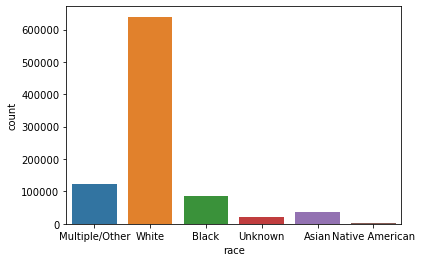

In [24]:
sns.countplot(data['race'])

/Users/niccolonobili/miniforge3/envs/ramirez/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

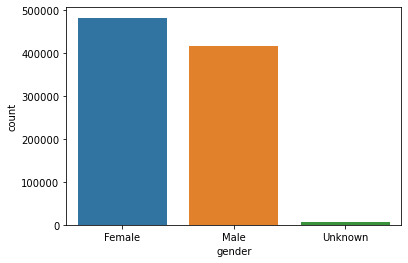

In [25]:
sns.countplot(data['gender'])

/Users/niccolonobili/miniforge3/envs/ramirez/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ethnicity', ylabel='count'>

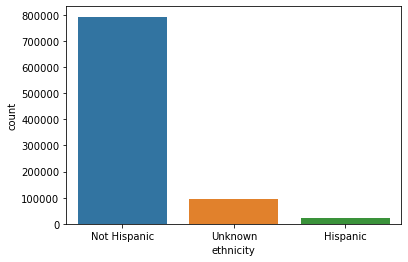

In [26]:
sns.countplot(data['ethnicity'])

/Users/niccolonobili/miniforge3/envs/ramirez/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vaccination_status', ylabel='count'>

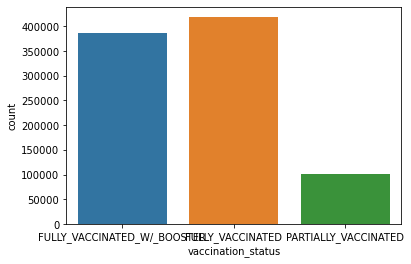

In [27]:
sns.countplot(data['vaccination_status'])

/Users/niccolonobili/miniforge3/envs/ramirez/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/niccolonobili/miniforge3/envs/ramirez/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/niccolonobili/miniforge3/envs/ramirez/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

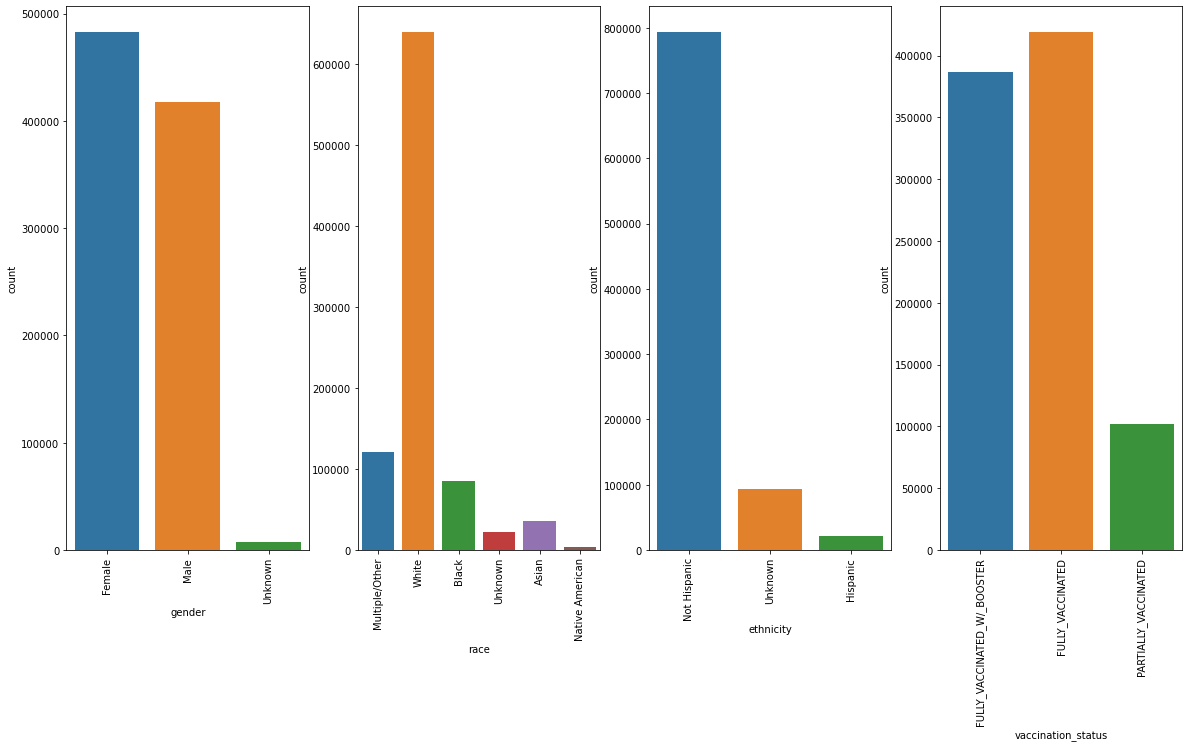

In [32]:
cols = ["gender", "race", "ethnicity", "vaccination_status"]

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for variable, subplot in zip(cols, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Population EDA
<a id="population-eda"></a>

This dataset requires a lot of pre-processing as we can see that it requires a lot of translation and how the data is structured within the csv.

In [35]:
population.head()

,Fact,Fact Note,"Allegheny County, Pennsylvania","Value Note for Allegheny County, Pennsylvania"
0,"Population Estimates, July 1 2021, (V2021)",NaN,"1,238,090",NaN
1,"Population estimates base, April 1, 2020, (V2021)",NaN,"1,250,578",NaN
2,"Population, percent change - April 1, 2020 (es...",NaN,-1.0%,NaN
3,"Population, Census, April 1, 2020",NaN,"1,250,578",NaN
4,"Population, Census, April 1, 2010",NaN,"1,223,348",NaN


In [39]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Fact                                           78 non-null     object 
 1   Fact Note                                      22 non-null     object 
 2   Allegheny County, Pennsylvania                 62 non-null     object 
 3   Value Note for Allegheny County, Pennsylvania  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 2.7+ KB


### POPULATION DISTRIBUTION

In [44]:
pop2020 = population.iloc[3,2]
pop2010 = population.iloc[4,2]
print(f"The population as of April 1, 2020 was {pop2020}")
print(f"The population as of April 1, 2010 was {pop2010}")

The population as of April 1, 2020 was 1,250,578
The population as of April 1, 2010 was 1,223,348


In [45]:
population.head(20)

,Fact,Fact Note,"Allegheny County, Pennsylvania","Value Note for Allegheny County, Pennsylvania"
0,"Population Estimates, July 1 2021, (V2021)",NaN,"1,238,090",NaN
1,"Population estimates base, April 1, 2020, (V2021)",NaN,"1,250,578",NaN
2,"Population, percent change - April 1, 2020 (es...",NaN,-1.0%,NaN
3,"Population, Census, April 1, 2020",NaN,"1,250,578",NaN
4,"Population, Census, April 1, 2010",NaN,"1,223,348",NaN
5,"Persons under 5 years, percent",NaN,5.2%,NaN
6,"Persons under 18 years, percent",NaN,18.6%,NaN
7,"Persons 65 years and over, percent",NaN,19.3%,NaN
8,"Female persons, percent",NaN,51.6%,NaN
9,"White alone, percent",NaN,79.9%,NaN
